In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df = df.sample(30000, random_state=32)

In [6]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
225379,225379,333705,333706,How does a retailer decide what to sell when a...,How do retailers decide what to sell when arri...,1
295700,295700,412228,71129,What should I do if I want to become an entrep...,What can be the best idea to become an entrepr...,1
242505,242505,354719,354720,What is impact of Brexit on VAT?,What are the origins of blessings and curses?,0
372502,372502,246105,57540,How could I start my own business?,How do you start a tech startup?,0
248743,248743,362225,28173,"What song has the lyrics: ashes on the ground,...",What are some good lyrical songs?,0


In [7]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
new_df.duplicated().sum()

np.int64(0)

is_duplicate
0    19067
1    10933
Name: count, dtype: int64
is_duplicate
0    63.556667
1    36.443333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

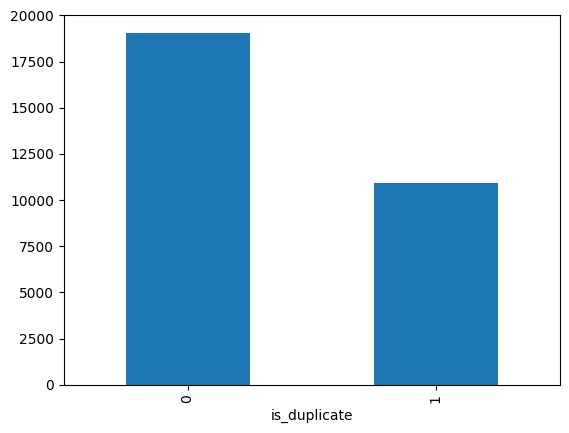

In [9]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55298
Number of questions getting repeated 3473


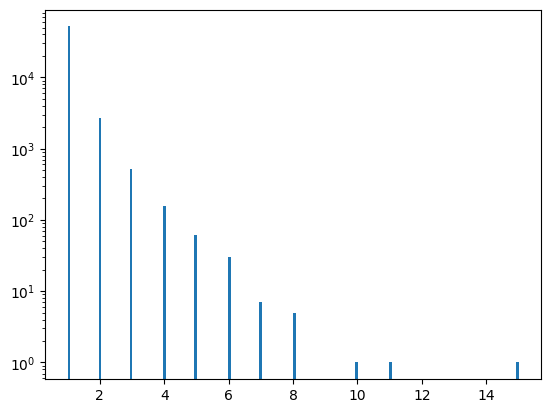

In [11]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [12]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
225379,225379,333705,333706,How does a retailer decide what to sell when a...,How do retailers decide what to sell when arri...,1,70,67
295700,295700,412228,71129,What should I do if I want to become an entrep...,What can be the best idea to become an entrepr...,1,82,52
242505,242505,354719,354720,What is impact of Brexit on VAT?,What are the origins of blessings and curses?,0,32,45
372502,372502,246105,57540,How could I start my own business?,How do you start a tech startup?,0,34,32
248743,248743,362225,28173,"What song has the lyrics: ashes on the ground,...",What are some good lyrical songs?,0,69,33


In [14]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
225379,225379,333705,333706,How does a retailer decide what to sell when a...,How do retailers decide what to sell when arri...,1,70,67,14,13
295700,295700,412228,71129,What should I do if I want to become an entrep...,What can be the best idea to become an entrepr...,1,82,52,18,10
242505,242505,354719,354720,What is impact of Brexit on VAT?,What are the origins of blessings and curses?,0,32,45,7,8
372502,372502,246105,57540,How could I start my own business?,How do you start a tech startup?,0,34,32,7,7
248743,248743,362225,28173,"What song has the lyrics: ashes on the ground,...",What are some good lyrical songs?,0,69,33,13,6


In [15]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [16]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
225379,225379,333705,333706,How does a retailer decide what to sell when a...,How do retailers decide what to sell when arri...,1,70,67,14,13,10
295700,295700,412228,71129,What should I do if I want to become an entrep...,What can be the best idea to become an entrepr...,1,82,52,18,10,5
242505,242505,354719,354720,What is impact of Brexit on VAT?,What are the origins of blessings and curses?,0,32,45,7,8,2
372502,372502,246105,57540,How could I start my own business?,How do you start a tech startup?,0,34,32,7,7,2
248743,248743,362225,28173,"What song has the lyrics: ashes on the ground,...",What are some good lyrical songs?,0,69,33,13,6,1


In [17]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [18]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
225379,225379,333705,333706,How does a retailer decide what to sell when a...,How do retailers decide what to sell when arri...,1,70,67,14,13,10,24
295700,295700,412228,71129,What should I do if I want to become an entrep...,What can be the best idea to become an entrepr...,1,82,52,18,10,5,26
242505,242505,354719,354720,What is impact of Brexit on VAT?,What are the origins of blessings and curses?,0,32,45,7,8,2,15
372502,372502,246105,57540,How could I start my own business?,How do you start a tech startup?,0,34,32,7,7,2,14
248743,248743,362225,28173,"What song has the lyrics: ashes on the ground,...",What are some good lyrical songs?,0,69,33,13,6,1,17


In [19]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
225379,225379,333705,333706,How does a retailer decide what to sell when a...,How do retailers decide what to sell when arri...,1,70,67,14,13,10,24,0.42
295700,295700,412228,71129,What should I do if I want to become an entrep...,What can be the best idea to become an entrepr...,1,82,52,18,10,5,26,0.19
242505,242505,354719,354720,What is impact of Brexit on VAT?,What are the origins of blessings and curses?,0,32,45,7,8,2,15,0.13
372502,372502,246105,57540,How could I start my own business?,How do you start a tech startup?,0,34,32,7,7,2,14,0.14
248743,248743,362225,28173,"What song has the lyrics: ashes on the ground,...",What are some good lyrical songs?,0,69,33,13,6,1,17,0.06


minimum characters 1
maximum characters 343
average num of characters 59


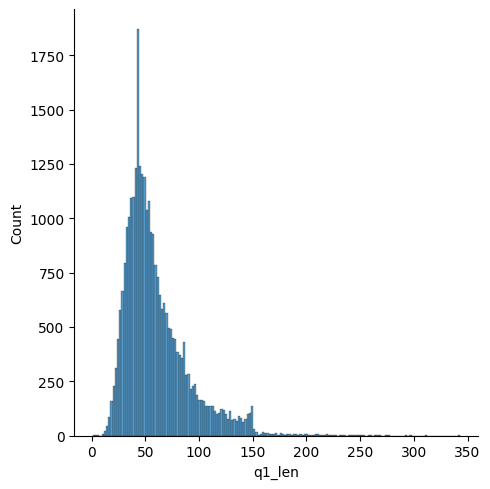

In [20]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 5
maximum characters 823
average num of characters 60


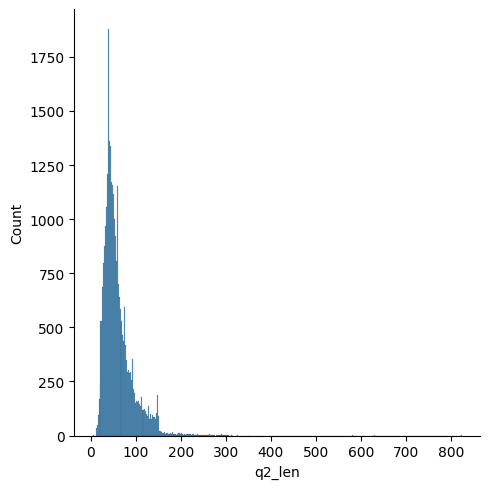

In [21]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 65
average num of words 10


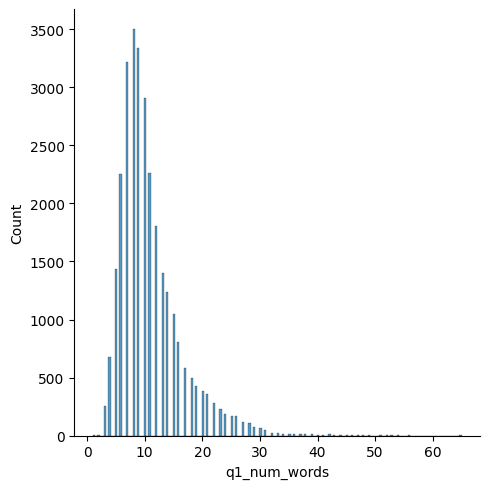

In [22]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 149
average num of words 11


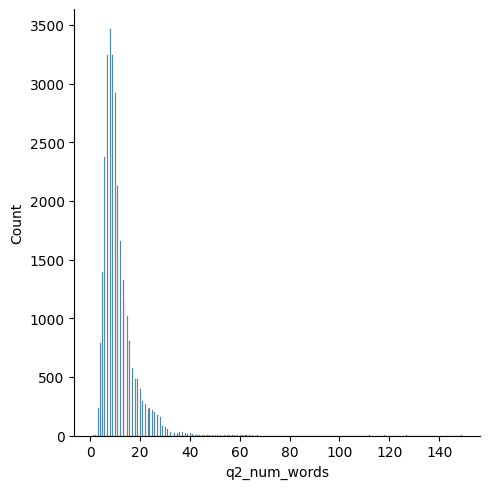

In [23]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

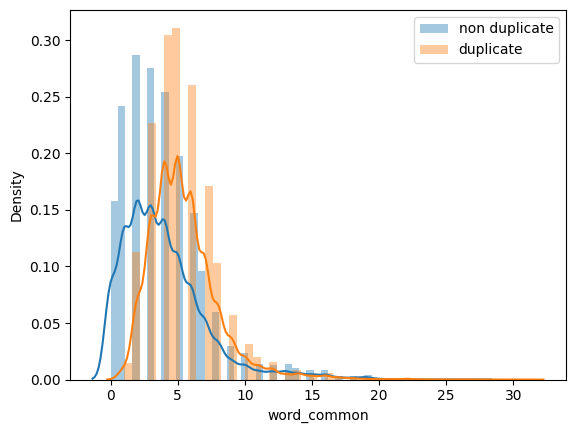

In [24]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

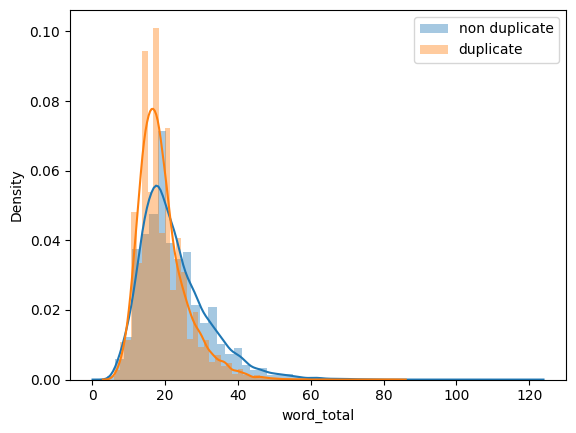

In [25]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

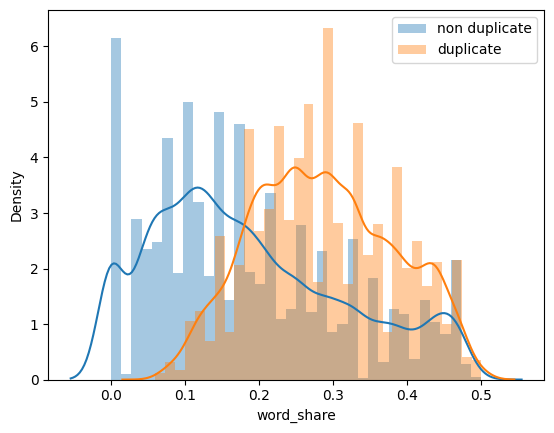

In [26]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [27]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
225379,How does a retailer decide what to sell when a...,How do retailers decide what to sell when arri...
295700,What should I do if I want to become an entrep...,What can be the best idea to become an entrepr...
242505,What is impact of Brexit on VAT?,What are the origins of blessings and curses?
372502,How could I start my own business?,How do you start a tech startup?
248743,"What song has the lyrics: ashes on the ground,...",What are some good lyrical songs?


In [28]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
225379,1,70,67,14,13,10,24,0.42
295700,1,82,52,18,10,5,26,0.19
242505,0,32,45,7,8,2,15,0.13
372502,0,34,32,7,7,2,14,0.14
248743,0,69,33,13,6,1,17,0.06


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [30]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [31]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
225379,1,70,67,14,13,10,24,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
295700,1,82,52,18,10,5,26,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
242505,0,32,45,7,8,2,15,0.13,0,0,...,0,0,0,0,0,0,0,0,0,0
372502,0,34,32,7,7,2,14,0.14,0,0,...,0,0,1,0,0,0,0,0,0,0
248743,0,69,33,13,6,1,17,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7686666666666667

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7653333333333333